In [2]:
import pandas as pd
import numpy as np

In [195]:
## Read the data
df=pd.read_csv('/Users/komalrungta/Desktop/sample_project/data/daily-minimum-temperatures-in-me.csv',parse_dates=True)
## index col= 0 for making date column as index column
## parse_date = True so that date is parsed in year month and date format

In [196]:
## check the data
df.head()

,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990",Unnamed: 2
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,NaN
2,1981-01-03,18.8,NaN
3,1981-01-04,14.6,NaN
4,1981-01-05,15.8,NaN


In [197]:
##df=df.set_index(df['Date'])

In [198]:
## Let's remove the unwanted column
df.drop(columns=['Unnamed: 2'],axis=1,inplace=True)

In [199]:
## renaming the temperature column for easy coding
df.rename(columns={'Daily minimum temperatures in Melbourne, Australia, 1981-1990':'Temp'},inplace=True)
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [200]:
## let's check the shape
df.shape

(3650, 2)

* We are extracting the values from the dataframe (which means we are extracting the temperature)
* IN AR model we have the inputs as the previous values of a particular TS and using that we predict the future
* So we only need the temperature to make prediction.
* Input is going to be the previous temperature & O/p is going to be the future temperature

In [201]:
## Describe the data
df.describe()

,Date,Temp
count,3650,3650
unique,3650,230
top,1989-08-18,11
freq,1,51


In [202]:
## check data types
df.dtypes

Date    object
Temp    object
dtype: object

In [203]:
np.where(df.Temp == '?0.2')

(array([565]),)

In [204]:
np.where(df.Temp == '?0.8')

(array([566]),)

In [205]:
np.where(df.Temp == '?0.1')

(array([1290]),)

In [206]:
df=df.drop(index=[565,566,1290])

In [207]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [208]:
df=df.set_index(df['Date'])
df.head()

,Date,Temp
Date,,
1981-01-01,1981-01-01,20.7
1981-01-02,1981-01-02,17.9
1981-01-03,1981-01-03,18.8
1981-01-04,1981-01-04,14.6
1981-01-05,1981-01-05,15.8


In [217]:
## drop off the date column
df = df.iloc[:,1]

In [218]:
df.head()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: object

In [225]:
df=df.to_frame()

In [226]:
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [249]:
df['Temp']=df.Temp.astype(float)

In [250]:
## Extracting the values
X=df.values
X

array([[20.7],
       [17.9],
       [18.8],
       ...,
       [13.5],
       [15.7],
       [13. ]])

In [251]:
## check data types
df.dtypes

Temp    float64
dtype: object

In [230]:
#df['Temp']=df.Temp.astype(float)

In [231]:
# import numpy as np

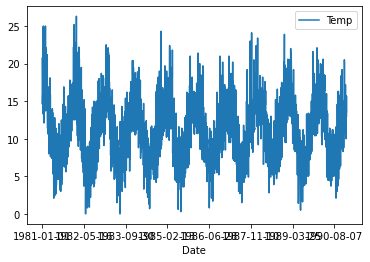

In [232]:
df.plot();

### Observation:
* Looks like the mean is constant.
* The data appears to be seasonal.

### Let's do the check for stationarity

In [235]:
from statsmodels.tsa.stattools import adfuller
dftest=adfuller(df.Temp,autolag='AIC') ## we pass the data here
print('1. ADF :',dftest[0])
print('2. P-value :',dftest[1])
print('3. Number of lags :',dftest[2])
print('4. Number of observation used for ADF Regression & Critical values calculation :',dftest[3])
print('5. Critical values :')
for key,val in dftest[4].items():
    print('\t',key ,': ',val)

1. ADF : -4.4446528471816995
2. P-value : 0.0002472372465853544
3. Number of lags : 20
4. Number of observation used for ADF Regression & Critical values calculation : 3626
5. Critical values :
	 1% :  -3.432154725699155
	 5% :  -2.8623374271161723
	 10% :  -2.567194482813802


## Conclusion
* p-value is less than 0.5 so we can say that we have a stationary data.
### Note:
* the graph shows seasonality because the data is compressed as it is showing more than 3000 observation, if we
reduce the no. observation we can see there is no evident repeating pattern.
* Hence we should go for stastical test as sometimes visual inspections are not always reliable.

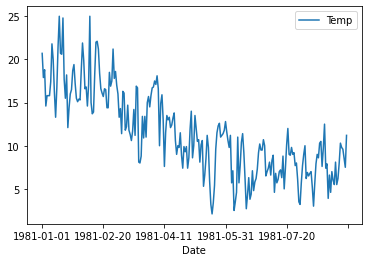

In [236]:
## let's see how the data looks like with fewer observations
df[:250].plot();

### How many past value should we consider??
* As AR model works on the past values (lags) what should be the optimum lag value to consider??

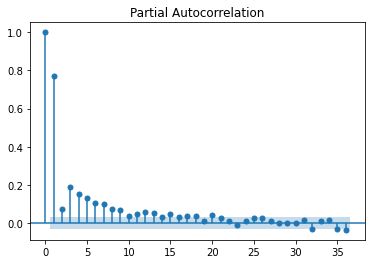

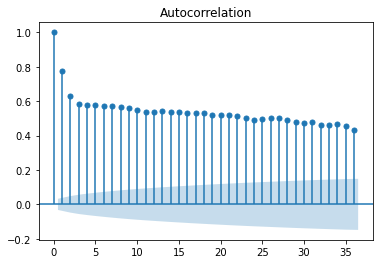

In [237]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_pacf(df.Temp);
plot_acf(df.Temp);

## Observation:
We see until 9 lag we have statistically significant correlation so we can 9 or 10 lags to train our AR model

In [252]:
## Split data into Train and test-Last 7 days
train = X[:len(X)-7]
test = X[len(X)-7:]

In [253]:
from statsmodels.tsa.ar_model import AutoReg
## Initialize and fit the model
model=AutoReg(train,lags=10).fit()

/Users/komalrungta/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [254]:
## check parameters of the model using model.summary
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3640
Model:                    AutoReg(10)   Log Likelihood               -8367.136
Method:               Conditional MLE   S.D. of innovations              2.426
Date:                Mon, 10 Jan 2022   AIC                              1.779
Time:                        19:47:42   BIC                              1.799
Sample:                            10   HQIC                             1.786
                                 3640                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9389      0.142      6.606      0.000       0.660       1.217
y.L1           0.6087      0.017     36.690      0.000       0.576       0.641
y.L2          -0.0847      0.019     -4.364      0.0

### Note:
* p-value indicates how significant each time lag was for making future prediction
* if p < 0.5 , the corresponding timelag (like y.L1 denotes lag =1) is significant.
* The lower p-value is better, here L6,L8,and L10 has certain higher p-value.

In [256]:
## Make prediction
## important parameter here is to provide start and end length, we gave here len(train) so that start length is from 
## where the train set ends
pred=model.predict(start=len(train),end=len(X)-1,dynamic=False)

[11.48069869 12.65111246 13.05344584 13.03934229] [[12.9]
 [14.6]
 [14. ]
 [13.6]]


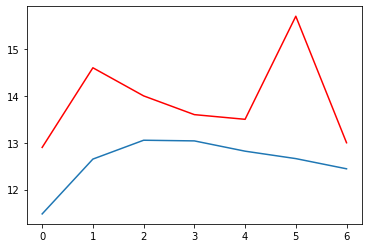

In [261]:
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test,color='red')
print(pred[:4],test[:4]) ## just checking 4 values

In [262]:
## Evaluate the model
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(test,pred))

In [263]:
print(rmse)

1.5597141376227235

In [269]:
## make future prediction
## we have data upto len(X)
## let's predict 7 days data len(X)+7
pred_future=model.predict(start=len(X)+1,end=len(X)+7,dynamic=False)
print("Forecasting for next week")
print(pred_future)

Forecasting for next week
[12.29382303 12.20737201 12.25206337 12.30920754 12.31539683 12.27647854
 12.22258792]


In [ ]:
## If the model doesn't know the past 7 days data it will first predict the past 7 days data and 
##then do the forecasting, so the total number of prediction made by model may be 15 instead of 7 even if we
## give 7 d